In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [11]:
anime_clean = anime.dropna(subset=['genre', 'rating', 'members'])
anime_clean = anime_clean[anime_clean['rating'] > 0]

In [12]:
anime_clean['genre'] = anime_clean['genre'].apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(anime_clean['genre']), columns=mlb.classes_)

anime_features = pd.concat([genre_encoded, anime_clean[['rating', 'members']].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
anime_features[['rating', 'members']] = scaler.fit_transform(anime_features[['rating', 'members']])


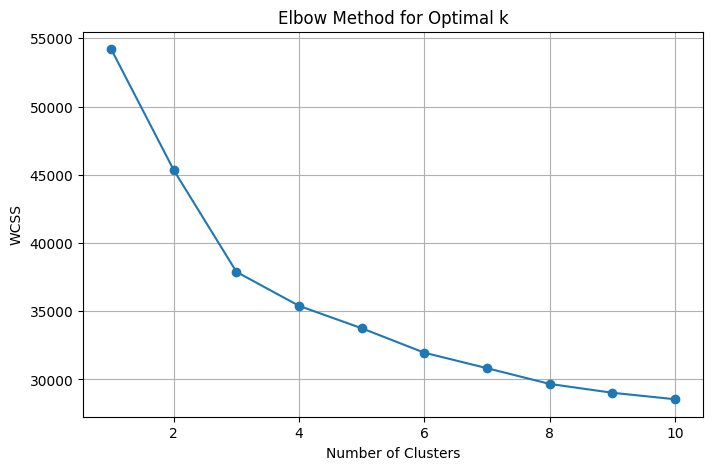

In [13]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(anime_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [14]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
anime_clean['Cluster'] = kmeans.fit_predict(anime_features)

anime_clean[['name', 'rating', 'members', 'Cluster']].head()


,name,rating,members,Cluster
0,Kimi no Na wa.,9.37,200630,2
1,Fullmetal Alchemist: Brotherhood,9.26,793665,2
2,Gintama°,9.25,114262,0
3,Steins;Gate,9.17,673572,2
4,Gintama&#039;,9.16,151266,0


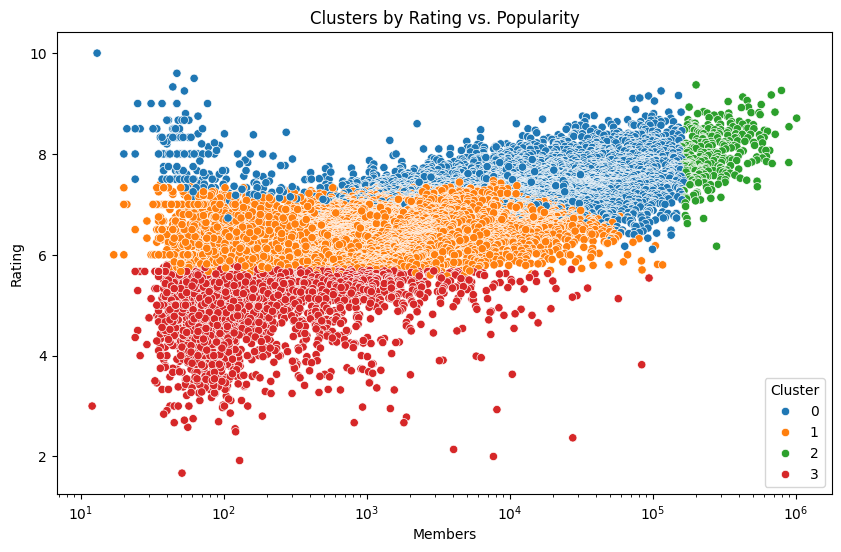

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_clean, x='members', y='rating', hue='Cluster', palette='tab10')
plt.title('Clusters by Rating vs. Popularity')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()


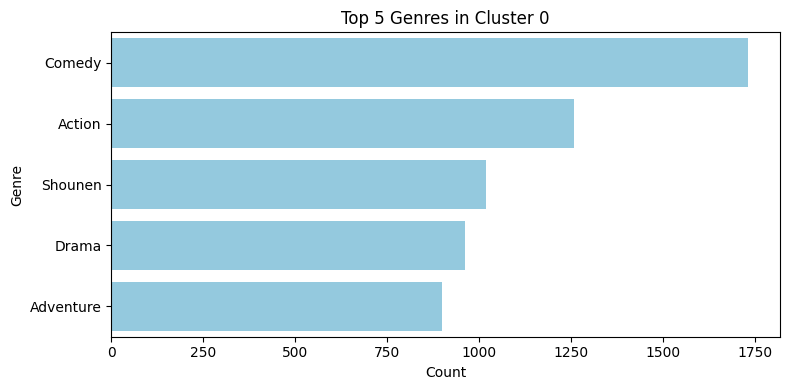

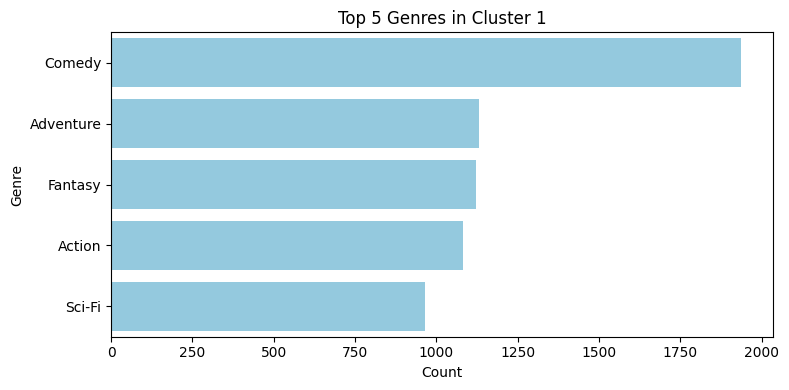

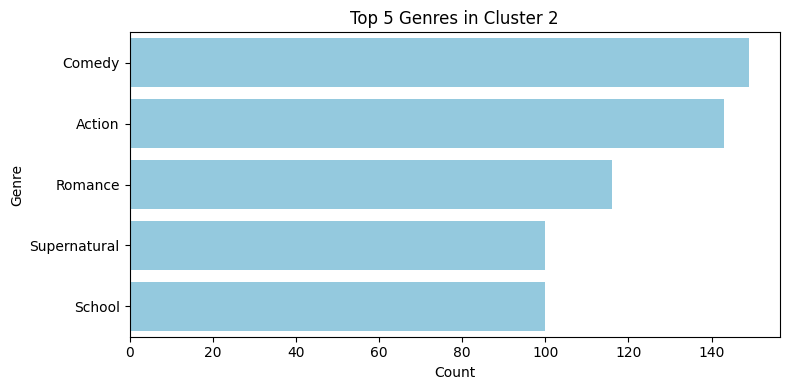

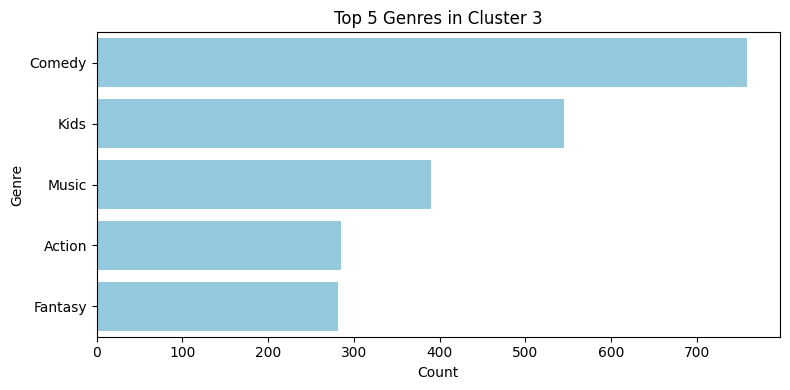

In [17]:
clustered_genres = pd.concat([anime_clean['Cluster'].reset_index(drop=True), genre_encoded], axis=1)

genre_counts = clustered_genres.groupby('Cluster').sum()

for i in range(k):
    top_genres = genre_counts.loc[i].sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_genres.values, y=top_genres.index, color='skyblue')
    plt.title(f'Top 5 Genres in Cluster {i}')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()


In [18]:
for i in range(k):
    print(f"\nTop anime in Cluster {i}:")
    display(anime_clean[anime_clean['Cluster'] == i][['name', 'rating', 'members']].sort_values(by='rating', ascending=False).head(5))



Top anime in Cluster 0:


,name,rating,members
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00,13
10400,Spoon-hime no Swing Kitchen,9.60,47
9595,Mogura no Motoro,9.50,62
9078,Kahei no Umi,9.33,44
10786,Yakusoku: Africa Mizu to Midori,9.25,53



Top anime in Cluster 1:


,name,rating,members
11130,Baku Ane: Otouto Shibocchau zo! The Animation,7.47,7672
11135,Toshi Densetsu Series,7.44,4447
11136,Mizugi Kanojo: The Animation,7.42,8649
1919,Tabisuru Nuigurumi: Traveling Daru,7.41,2565
9457,Mama Ohanashi Kikasete,7.40,59



Top anime in Cluster 2:


,name,rating,members
0,Kimi no Na wa.,9.37,200630
1,Fullmetal Alchemist: Brotherhood,9.26,793665
3,Steins;Gate,9.17,673572
6,Hunter x Hunter (2011),9.13,425855
10,Clannad: After Story,9.06,456749



Top anime in Cluster 3:


,name,rating,members
6873,Mori no e,5.87,202
8485,Doukyuusei,5.83,116
6978,I&#039;m Here with You,5.81,327
6976,Evidence,5.81,705
10490,Tarepanda,5.81,118
